In [20]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [21]:
df_brent = pd.read_csv("./processed_tables/brent.csv")
df_precios = pd.read_csv("./processed_tables/precios.csv")
df_precipitacion = pd.read_csv("./processed_tables/precipitacion.csv")
df_temperatura = pd.read_csv("./processed_tables/temperatura.csv")
df_trm = pd.read_csv("./processed_tables/TRM.csv")

In [22]:
df_brent = df_brent.rename(columns={"Fecha": "Date"})
df_precipitacion = df_precipitacion.rename(columns={"date": "Date"})
df_temperatura = df_temperatura.rename(columns={"date": "Date"})
df_trm = df_trm.rename(columns={"vigenciadesde": "Date"})

# Perform left joins
df_merged = pd.merge(df_precios, df_brent, on="Date", how="left")
df_merged = pd.merge(df_merged, df_precipitacion, on="Date", how="left")
df_merged = pd.merge(df_merged, df_temperatura, on="Date", how="left")
df_merged = pd.merge(df_merged, df_trm, on="Date", how="left")

In [23]:
df_merged.to_csv("processed_tables/merged.csv", index=False)

In [24]:
df_merged.columns

Index(['Date', 'energy_price', 'brent_value', 'precipitacion_unidadmedida',
       'precipitacion_amazonas', 'precipitacion_antioquia',
       'precipitacion_arauca', 'precipitacion_atlantico',
       'precipitacion_bogota', 'precipitacion_bolivar', 'precipitacion_boyaca',
       'precipitacion_caldas', 'precipitacion_caqueta',
       'precipitacion_casanare', 'precipitacion_cauca', 'precipitacion_cesar',
       'precipitacion_choco', 'precipitacion_cordoba',
       'precipitacion_cundinamarca', 'precipitacion_guainia',
       'precipitacion_guaviare', 'precipitacion_huila',
       'precipitacion_la guajira', 'precipitacion_magdalena',
       'precipitacion_meta', 'precipitacion_narino',
       'precipitacion_norte de santander', 'precipitacion_putumayo',
       'precipitacion_quindio', 'precipitacion_risaralda',
       'precipitacion_san andres providencia', 'precipitacion_santander',
       'precipitacion_sucre', 'precipitacion_tolima',
       'precipitacion_valle del cauca', 'precip

In [25]:
df_merged.shape

(644, 74)

In [26]:
print(f"Fecha mínima: {df_merged.loc[0]['Date']}")

Fecha mínima: 2021-10-01


In [27]:
print(f"Fecha máxima: {df_merged.loc[df_merged.shape[0] - 1]['Date']}")

Fecha máxima: 2023-09-30


In [28]:
df_merged.describe()

,energy_price,brent_value,precipitacion_amazonas,precipitacion_antioquia,precipitacion_arauca,precipitacion_atlantico,precipitacion_bogota,precipitacion_bolivar,precipitacion_boyaca,precipitacion_caldas,...,temp_QUINDIO,temp_RISARALDA,temp_SANTANDER,temp_SUCRE,temp_TOLIMA,temp_VALLE DEL CAUCA,temp_VICHADA,temp_avg_pais,temp_avg_represas,TRM
count,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,...,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000
mean,322.121164,89.611661,6.400516,68.601511,10.241483,40.353079,10.732652,47.941181,106.510629,77.277322,...,26.534008,26.457596,24.146805,32.580889,26.149379,27.144354,30.547821,26.976764,24.899482,4313.503168
std,241.618420,12.144518,10.791224,72.016505,15.760833,92.093514,18.775336,75.967073,114.688382,87.212388,...,2.950855,2.582673,2.905742,2.228982,2.249934,2.333827,2.634650,1.555564,1.997670,374.097100
min,87.255265,70.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.400000,13.733333,14.372941,24.333333,15.957255,18.060086,22.800000,19.128896,15.752039,3706.950000
25%,133.920626,80.808750,0.119000,12.299500,0.000000,5.000000,0.435000,5.080000,29.725000,10.460000,...,24.820119,25.166860,22.432479,31.490000,24.990911,26.108570,28.285000,26.406838,23.990580,3972.902500
50%,239.984244,85.955000,2.367000,45.497000,3.050000,16.125000,3.925000,19.515000,69.026000,46.690000,...,26.294401,26.476529,23.930614,33.000000,26.310696,27.231282,30.900000,27.122750,24.913238,4303.340000
75%,435.658130,95.925000,9.266018,97.365291,16.600000,34.004888,11.805000,62.892500,135.414000,108.550000,...,28.308820,28.209095,26.307220,34.100000,27.409222,28.656762,32.600000,27.871926,26.108156,4636.830000
max,1061.527174,123.440000,102.080000,432.219000,152.100000,1120.190000,188.700000,701.920000,733.292000,486.500000,...,34.032470,31.901733,31.733333,37.275000,33.650000,32.368333,37.100000,30.288302,29.951683,5061.210000


In [29]:
precipitacion_columns = df_merged.filter(like='precipitacion_')
temp_columns = df_merged.filter(like='temp_')
specific_columns_df = df_merged[["brent_value", "TRM"]]
exogen_data = pd.concat([precipitacion_columns, temp_columns, specific_columns_df], axis=1)
exogen_data.drop("precipitacion_unidadmedida", axis=1, inplace=True)

In [30]:
# Borrar una vez que tengamos la data completa
exogen_data.bfill(inplace=True)

## Estandarización de la data

Para empezar a modelar la data, se debe estandarizar los datos, para ello se utilizará la librería `sklearn.preprocessing`, la cual nos permite estandarizar los datos de una manera sencilla.

In [31]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(exogen_data)
scaled_df = pd.DataFrame(scaled_data, columns=exogen_data.columns)
scaled_df

,precipitacion_amazonas,precipitacion_antioquia,precipitacion_arauca,precipitacion_atlantico,precipitacion_bogota,precipitacion_bolivar,precipitacion_boyaca,precipitacion_caldas,precipitacion_caqueta,precipitacion_casanare,...,temp_RISARALDA,temp_SANTANDER,temp_SUCRE,temp_TOLIMA,temp_VALLE DEL CAUCA,temp_VICHADA,temp_avg_pais,temp_avg_represas,brent_value,TRM
0,-0.509005,0.912201,0.759339,0.139390,-0.557688,4.888002,-0.561178,-0.735298,-0.530775,-0.284457,...,0.000597,-0.118955,1.422880,0.612716,0.616277,0.323702,0.546827,-0.114337,-0.917312,-1.339552
1,-0.593583,0.814967,1.622908,-0.161734,-0.569948,5.703726,-0.349135,-0.046788,-0.437031,-0.355927,...,0.701471,0.354174,0.203140,1.370869,0.499932,1.159376,1.154362,0.619803,-0.917312,-1.423606
2,-0.538867,0.403339,1.559410,-0.248126,-0.567816,3.445073,0.004270,-0.665300,-0.527751,-0.198452,...,0.869386,0.475783,1.939212,1.655371,0.645312,1.159376,1.495428,0.950203,-0.917312,-1.423606
3,-0.580600,-0.100687,1.718155,-0.183251,-0.287443,3.802742,0.274778,-0.533335,-0.300951,0.339387,...,0.588202,0.444450,2.107581,1.504325,0.896644,0.057805,1.150745,0.723472,-0.761153,-1.423606
4,0.016831,1.136810,2.981760,0.521690,-0.560886,0.362265,1.586688,0.365171,0.158697,-0.180160,...,-0.106008,-0.087541,-0.365573,0.219063,-0.446079,-0.701899,0.112145,-0.197147,-0.614059,-1.411032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,0.847595,-0.743484,-0.631262,-0.323217,-0.572080,0.542219,-0.824705,-0.775691,-0.003994,-0.336545,...,1.062673,1.953926,-0.530200,1.927756,0.963555,1.767140,1.767855,1.666261,0.279630,-0.698124
640,-0.593583,-0.938035,-0.555064,-0.213895,0.936388,-0.232402,1.273912,-0.706381,-0.066289,-0.323221,...,1.740792,1.292652,-0.305708,2.276185,1.340733,0.171761,1.911924,1.783337,0.491825,-0.654812
641,-0.491569,-0.803239,-0.174078,-0.407219,0.227461,-0.007129,0.594152,-0.289832,-0.066894,0.188816,...,-0.913561,1.990089,0.188174,0.563693,0.590405,1.197362,1.320419,1.326154,0.544977,-0.588281
642,3.330243,-0.643429,-0.574114,-0.303222,-0.518777,-0.378631,-0.818597,-0.816313,-0.340868,-0.472216,...,2.012040,1.860934,0.592260,1.564500,1.708934,0.517426,1.784385,1.808617,0.491825,-0.609762


In [32]:
scaled_df.cov()

,precipitacion_amazonas,precipitacion_antioquia,precipitacion_arauca,precipitacion_atlantico,precipitacion_bogota,precipitacion_bolivar,precipitacion_boyaca,precipitacion_caldas,precipitacion_caqueta,precipitacion_casanare,...,temp_RISARALDA,temp_SANTANDER,temp_SUCRE,temp_TOLIMA,temp_VALLE DEL CAUCA,temp_VICHADA,temp_avg_pais,temp_avg_represas,brent_value,TRM
precipitacion_amazonas,1.001555,-0.000582,-0.066191,-0.075131,0.106628,-0.033421,0.003896,0.029657,-0.022749,-0.013532,...,0.026760,-0.007239,0.104096,0.071164,0.037953,-0.016484,0.057435,0.036455,0.015203,-0.011634
precipitacion_antioquia,-0.000582,1.001555,0.315229,0.085012,0.271188,0.325182,0.392204,0.595621,0.209590,0.116413,...,-0.309835,-0.388105,-0.251618,-0.184764,-0.346746,-0.019543,-0.290459,-0.352898,0.330126,-0.166123
precipitacion_arauca,-0.066191,0.315229,1.001555,0.017738,0.045786,0.247773,0.264653,0.109853,0.209618,0.208907,...,0.000819,-0.051511,0.021908,0.072191,-0.021790,0.022720,-0.036276,-0.065313,0.034978,-0.261270
precipitacion_atlantico,-0.075131,0.085012,0.017738,1.001555,0.013373,0.119354,0.152345,0.086103,0.019560,0.052925,...,-0.067516,-0.120812,-0.184989,0.002981,-0.043851,0.095596,-0.054500,-0.082364,0.115646,-0.007311
precipitacion_bogota,0.106628,0.271188,0.045786,0.013373,1.001555,0.074311,0.330777,0.353309,0.104891,0.118155,...,-0.101085,-0.191122,-0.036298,-0.123242,-0.153046,-0.082724,-0.140860,-0.158058,0.252581,-0.042178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
temp_VICHADA,-0.016484,-0.019543,0.022720,0.095596,-0.082724,0.036665,-0.034847,-0.070620,-0.034148,-0.077804,...,0.296311,0.249708,0.228243,0.328724,0.234630,1.001555,0.465435,0.324001,0.032288,-0.412972
temp_avg_pais,0.057435,-0.290459,-0.036276,-0.054500,-0.140860,-0.158164,-0.137258,-0.302343,-0.126048,0.012519,...,0.799560,0.796504,0.743693,0.792879,0.824651,0.465435,1.001555,0.954823,-0.333747,-0.133398
temp_avg_represas,0.036455,-0.352898,-0.065313,-0.082364,-0.158058,-0.199382,-0.171212,-0.366820,-0.112516,0.050146,...,0.846246,0.867698,0.707968,0.811585,0.863354,0.324001,0.954823,1.001555,-0.355456,-0.068125
brent_value,0.015203,0.330126,0.034978,0.115646,0.252581,0.191432,0.051290,0.201536,0.051162,0.006292,...,-0.192965,-0.477449,-0.305269,-0.075963,-0.238564,0.032288,-0.333747,-0.355456,1.001555,-0.318120


In [42]:
scaled_df_corr = scaled_df.corr()
scaled_df_corr.style.background_gradient(cmap='coolwarm')

,precipitacion_amazonas,precipitacion_antioquia,precipitacion_arauca,precipitacion_atlantico,precipitacion_bogota,precipitacion_bolivar,precipitacion_boyaca,precipitacion_caldas,precipitacion_caqueta,precipitacion_casanare,precipitacion_cauca,precipitacion_cesar,precipitacion_choco,precipitacion_cordoba,precipitacion_cundinamarca,precipitacion_guainia,precipitacion_guaviare,precipitacion_huila,precipitacion_la guajira,precipitacion_magdalena,precipitacion_meta,precipitacion_narino,precipitacion_norte de santander,precipitacion_putumayo,precipitacion_quindio,precipitacion_risaralda,precipitacion_san andres providencia,precipitacion_santander,precipitacion_sucre,precipitacion_tolima,precipitacion_valle del cauca,precipitacion_vaupes,precipitacion_vichada,precipitacion_colombia,precipitacion_departamentos_represa,temp_AMAZONAS,temp_ANTIOQUIA,temp_ARAUCA,temp_ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA,temp_ATLANTICO,temp_BOGOTA,temp_BOLIVAR,temp_BOYACA,temp_CALDAS,temp_CAQUETA,temp_CASANARE,temp_CAUCA,temp_CESAR,temp_CHOCO,temp_CORDOBA,temp_CUNDINAMARCA,temp_GUAINIA,temp_GUAVIARE,temp_HUILA,temp_LA GUAJIRA,temp_MAGDALENA,temp_META,temp_NARINO,temp_NORTE DE SANTANDER,temp_PUTUMAYO,temp_QUINDIO,temp_RISARALDA,temp_SANTANDER,temp_SUCRE,temp_TOLIMA,temp_VALLE DEL CAUCA,temp_VICHADA,temp_avg_pais,temp_avg_represas,brent_value,TRM
precipitacion_amazonas,1.000000,-0.000581,-0.066088,-0.075014,0.106463,-0.033369,0.003890,0.029611,-0.022714,-0.013511,0.087176,-0.015286,0.083052,0.000550,0.093379,-0.059516,0.043675,-0.010479,-0.105463,-0.001357,-0.022306,0.036657,0.046852,-0.000844,0.066723,0.028251,-0.062482,0.025980,0.008736,0.045353,0.100075,0.003200,0.008473,0.070618,0.063766,-0.232514,0.052096,0.073518,-0.060093,0.110331,0.052482,0.082042,0.051021,-0.056883,0.055474,0.060518,0.024629,0.086051,0.127459,0.070835,0.014092,0.101549,0.026618,0.082148,0.017831,-0.011986,0.122759,0.101894,-0.008471,0.041728,-0.011253,0.026718,-0.007228,0.103934,0.071053,0.037895,-0.016458,0.057346,0.036399,0.015180,-0.011616
precipitacion_antioquia,-0.000581,1.000000,0.314739,0.084880,0.270766,0.324677,0.391595,0.594696,0.209265,0.116232,0.335611,0.137814,0.003961,0.455286,0.297180,0.074953,0.351991,0.286523,0.140865,0.404900,0.345804,0.351733,0.194504,0.083891,0.395891,0.384270,0.141533,0.519930,0.306948,0.466152,0.514026,0.164454,0.026048,0.629993,0.713507,-0.087057,-0.253362,0.180829,0.004907,-0.234126,-0.196108,-0.288471,-0.101192,-0.380997,-0.220491,-0.184058,-0.299346,-0.264779,-0.193303,-0.319414,-0.303399,-0.125014,-0.405770,-0.185246,0.030130,-0.105091,-0.009625,0.146918,-0.254834,-0.034198,-0.405214,-0.309354,-0.387502,-0.251227,-0.184477,-0.346207,-0.019513,-0.290008,-0.352350,0.329614,-0.165865
precipitacion_arauca,-0.066088,0.314739,1.000000,0.017710,0.045715,0.247388,0.264242,0.109682,0.209292,0.208583,0.072115,0.061164,-0.017620,0.275258,0.084851,0.107890,0.117684,0.025013,0.039089,0.109131,0.247661,-0.007031,-0.047415,0.056463,0.031036,0.096886,0.142209,0.191792,0.190068,0.130386,0.192756,0.130980,0.287361,0.246984,0.244383,0.038514,0.006995,0.380051,0.185561,-0.041487,-0.123384,-0.046943,-0.135892,-0.090326,-0.208100,-0.149469,0.031148,-0.063089,-0.109112,-0.107389,-0.158830,-0.071209,-0.242535,-0.054332,0.160982,0.006801,-0.131026,0.084866,0.017726,-0.094691,-0.038200,0.000818,-0.051431,0.021874,0.072079,-0.021756,0.022685,-0.036219,-0.065212,0.034924,-0.260864
precipitacion_atlantico,-0.075014,0.084880,0.017710,1.000000,0.013352,0.119168,0.152109,0.085969,0.019529,0.052842,0.056464,0.036497,0.085676,0.130977,0.104012,0.116561,0.119205,0.056070,0.230301,0.204079,0.060673,0.057876,0.053496,0.012250,0.022535,0.051031,0.137871,0.254622,0.114213,0.093871,0.025685,-0.050822,-0.019426,0.283069,0.163391,0.133536,-0.098189,-0.045853,0.117832,-0.168199,0.006932,-0.164992,-0.063107,-0.080350,0.070169,0.007875,-0.079185,-0.124734,-0.181007,-0.159780,-0.043825,0.068818,-0.023108,0.031834,-0.049335,0.028422,0.089177,0.041105,-0.052018,0.0869

In [33]:
n_components = 2
pca = PCA(n_components=n_components)  # n_components is the number of components to keep
pca_result = pca.fit_transform(scaled_data)

In [34]:
pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])
pca_df

,Principal Component 1,Principal Component 2
0,-0.369305,2.382136
1,-2.586060,4.129466
2,-4.302857,3.536636
3,-2.764067,3.711196
4,1.933753,4.543913
...,...,...
639,-7.005137,1.514320
640,-7.592377,1.918838
641,-5.460224,1.362070
642,-8.245227,0.067351


## Varianza explicada por las dos componentes principales

In [35]:
explained_variance = np.sum(pca.explained_variance_)
print(f"Varianza explicada por las {n_components} componentes: {round(explained_variance, 2)}%")

Varianza explicada por las 2 componentes: 26.31%


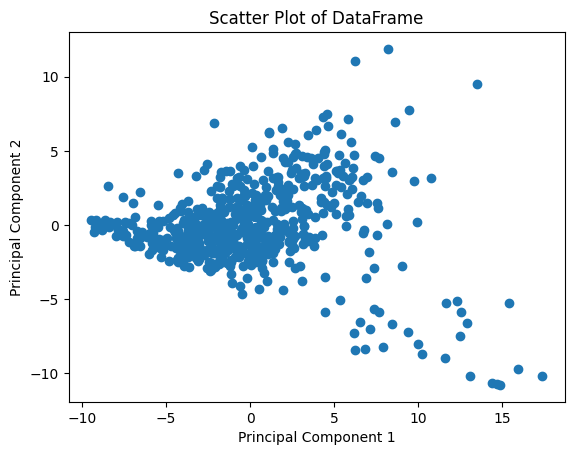

In [36]:
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of DataFrame')
plt.show()

## Regresión lineal

Usando `statsmodels` se puede realizar una regresión lineal, para ello se debe importar la librería y crear un modelo de regresión lineal, para luego ajustarlo con los datos de entrenamiento.

In [37]:
X = sm.add_constant(scaled_df)

# Create a model
model = sm.OLS(df_merged["energy_price"], X)

# Fit the model
result = model.fit()
result_summary = result.summary()

# Print out the statistics
print(result_summary)

                            OLS Regression Results                            
Dep. Variable:           energy_price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     14.00
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           9.07e-84
Time:                        11:13:03   Log-Likelihood:                -4136.0
No. Observations:                 644   AIC:                             8408.
Df Residuals:                     576   BIC:                             8712.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [38]:
result_summary_df = result_summary.tables[1]
result_summary_df

,coef,std err,t,P>|t|,[0.025,0.975]
const,322.1212,6.205,51.911,0.000,309.934,334.309
precipitacion_amazonas,4.2771,6.968,0.614,0.540,-9.409,17.963
precipitacion_antioquia,-6.5135,10.119,-0.644,0.520,-26.388,13.361
precipitacion_arauca,-3.4845,8.766,-0.397,0.691,-20.702,13.733
precipitacion_atlantico,-7.5430,7.280,-1.036,0.301,-21.841,6.755
precipitacion_bogota,9.3153,7.967,1.169,0.243,-6.332,24.962
precipitacion_bolivar,-7.6579,7.542,-1.015,0.310,-22.471,7.155
precipitacion_boyaca,14.3625,9.144,1.571,0.117,-3.597,32.322
precipitacion_caldas,-11.9164,10.957,-1.088,0.277,-33.438,9.605
precipitacion_caqueta,7.5481,7.775,0.971,0.332,-7.722,22.818


In [39]:
significant_variables = []
significance_level = 0.05
for i in range(1, len(result_summary_df)):
    p_value = float(result_summary_df[i][4].data)
    if p_value < significance_level:
        significant_variables.append(result_summary_df[i][0].data)
print(pd.DataFrame({"Variables significativas": significant_variables}))

               Variables significativas
0                                 const
1                   precipitacion_cauca
2   precipitacion_departamentos_represa
3                        temp_ANTIOQUIA
4                           temp_ARAUCA
5                           temp_BOYACA
6                           temp_CALDAS
7                          temp_CAQUETA
8                            temp_CESAR
9                     temp_CUNDINAMARCA
10                         temp_GUAINIA
11                           temp_HUILA
12                          temp_NARINO
13              temp_NORTE DE SANTANDER
14                       temp_SANTANDER
15                 temp_VALLE DEL CAUCA
16                    temp_avg_represas
17                          brent_value
18                                  TRM
